<a href="https://colab.research.google.com/github/earthearthton-prog/geophysics-class-2025/blob/main/U11310016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install condacolab --quiet
# need to install condacolab for a python 3.11 pin
import condacolab
condacolab.install_from_url("https://github.com/conda-forge/miniforge/releases/download/25.3.1-0/Miniforge3-Linux-x86_64.sh")

✨🍰✨ Everything looks OK!


In [ ]:
# 安裝一個範例套件 (例如：pandas)
!pip install pandas

# 導入安裝的套件
import pandas as pd
import numpy as np # 導入常用套件
import matplotlib.pyplot as plt # 導入 Matplotlib 用於繪圖
import seaborn as sns # 導入 Seaborn 用於美觀的繪圖

print("Pandas 版本:", pd.__version__)
print("Numpy 版本:", np.__version__)
print("Matplotlib 版本:", plt.matplotlib.__version__)
print("Seaborn 版本:", sns.__version__)

Pandas 版本: 2.3.3
Numpy 版本: 2.0.2
Matplotlib 版本: 3.10.0
Seaborn 版本: 0.13.2


In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2025-11-25 02:27:50--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.206.100, 173.194.206.139, 173.194.206.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.206.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-11-25 02:27:50--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.201.132, 2607:f8b0:4001:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.201.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.09s   

2025-11-25 02

In [ ]:
!mamba install pygmt --quiet # <--- it takes around 1 minute

In [ ]:
!mamba install obspy --quiet

In [ ]:
import pygmt
pygmt.show_versions()

PyGMT information:
  version: v0.17.0
System information:
  python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
  executable: /usr/bin/python3.real
  machine: Linux-6.6.105+-x86_64-with-glibc2.35
Dependency information:
  numpy: 2.3.5
  pandas: 2.2.2
  xarray: 2025.11.0
  packaging: 25.0
  contextily: None
  geopandas: 1.1.1
  IPython: 7.34.0
  pyarrow: 18.1.0
  rioxarray: None
  gdal: 3.11.0
  ghostscript: 10.06.0
GMT library information:
  version: 6.5.0
  padding: 2
  share dir: /usr/local/share/gmt
  plugin dir: /usr/local/lib/gmt/plugins
  library path: /usr/local/lib/libgmt.so
  cores: 2
  grid layout: rows
  image layout: 
  binary version: 6.5.0


# **Gemini**

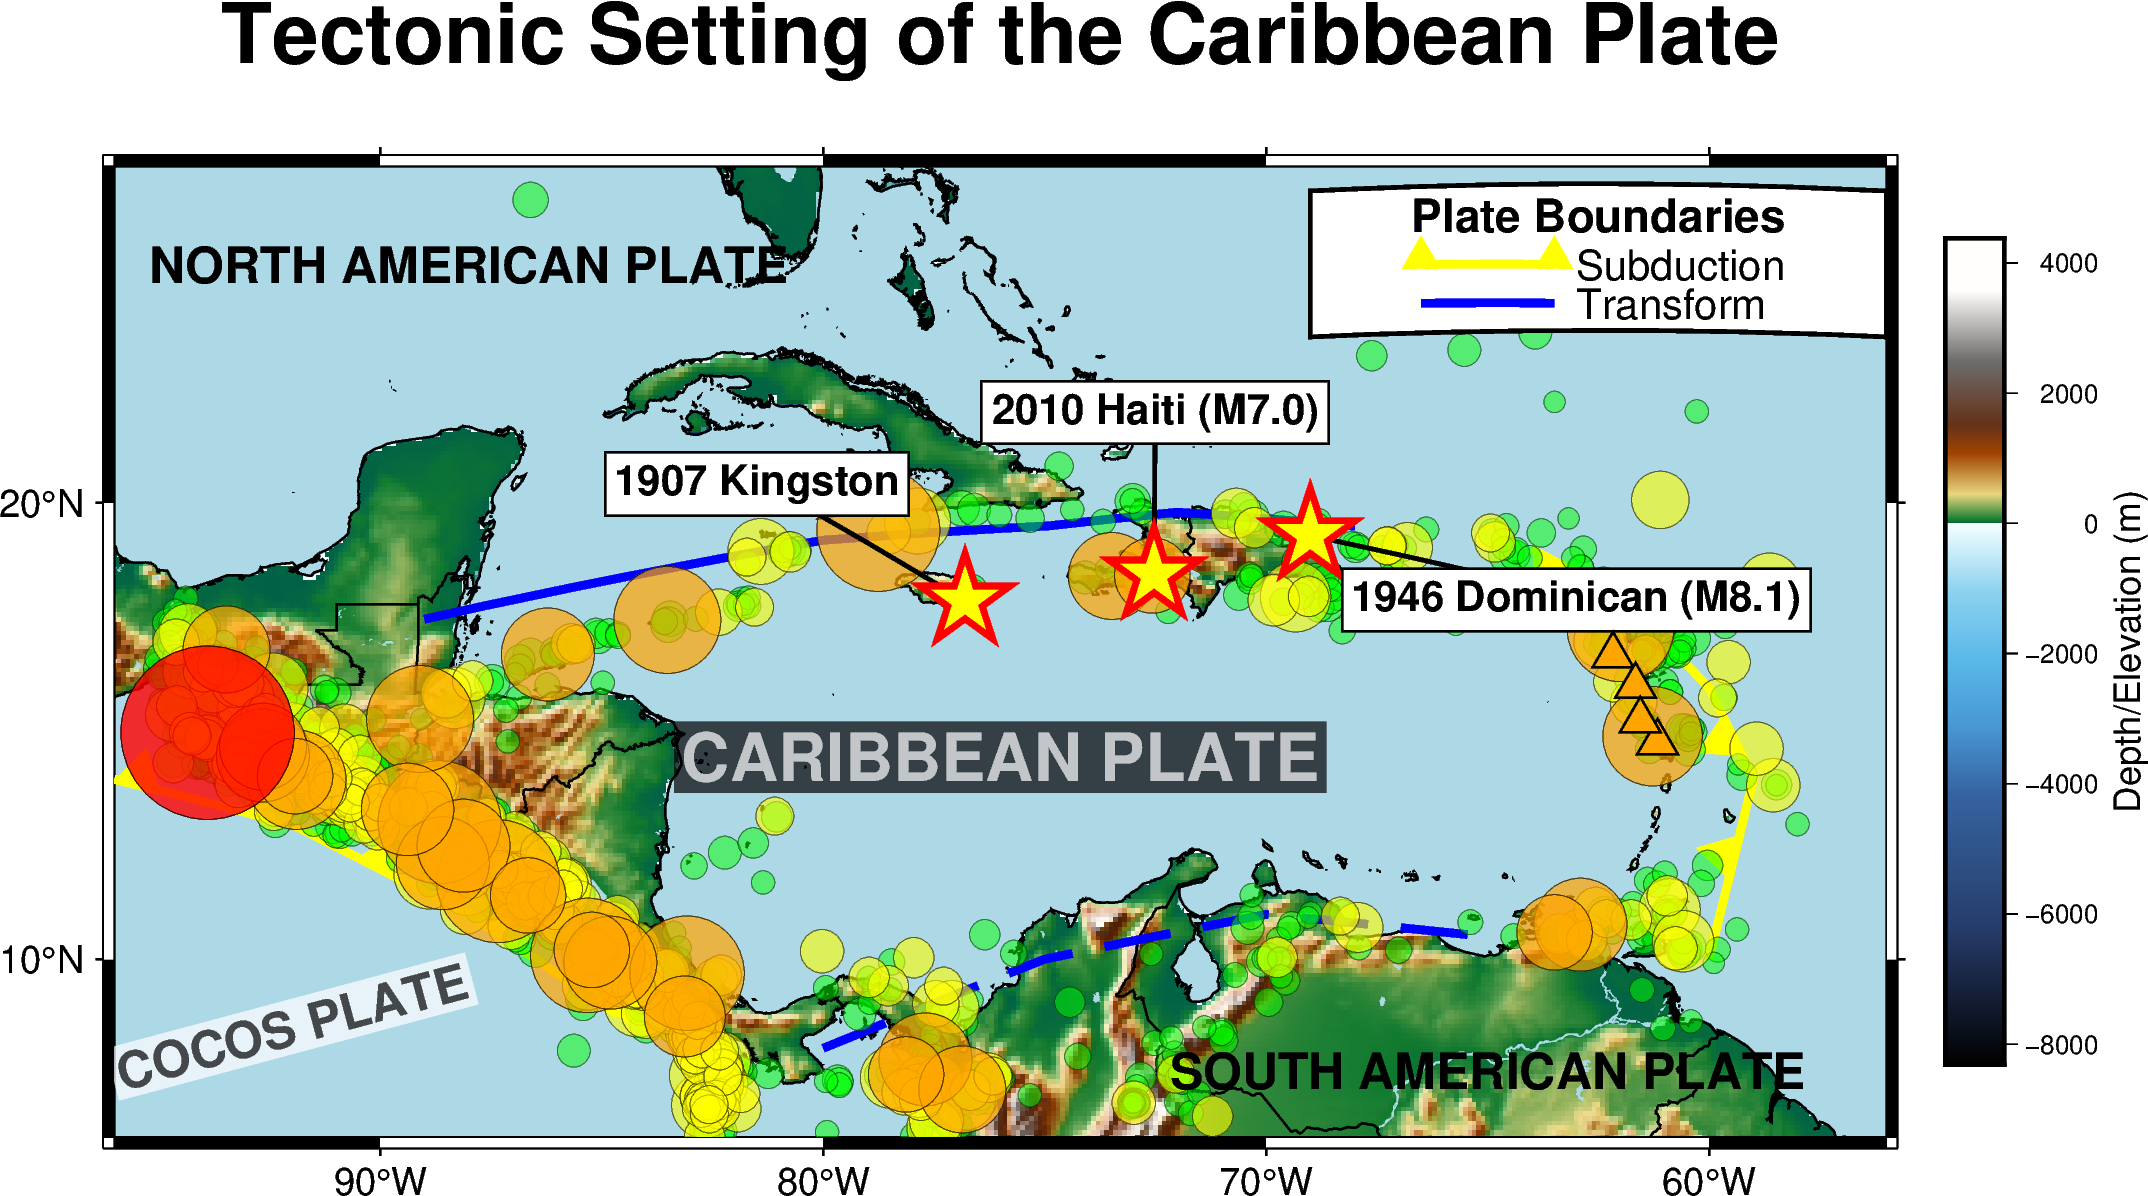

In [ ]:
import pygmt
import pandas as pd
import numpy as np

# -----------------------------------------------------------------------------
# 1. 數據準備
# -----------------------------------------------------------------------------
earthquake_url = "https://earthquake.usgs.gov/fdsnws/event/1/query.csv"
params = {
    "starttime": "1970-01-01",
    "endtime": "2023-12-31",
    "minmagnitude": 5.0,
    "minlatitude": 5,
    "maxlatitude": 28,
    "minlongitude": -95,
    "maxlongitude": -55,
    "orderby": "magnitude",
    "limit": 1500
}
try:
    query_string = "&".join([f"{k}={v}" for k, v in params.items()])
    eq_data = pd.read_csv(f"{earthquake_url}?{query_string}")
except:
    print("無法下載地震數據，將使用空數據。")
    eq_data = pd.DataFrame(columns=['latitude', 'longitude', 'mag', 'depth'])

# 定義著名歷史地震
famous_quakes = pd.DataFrame({
    'lon': [-72.533, -76.8, -69.0],
    'lat': [18.457, 17.9, 19.3],
    'label': ['2010 Haiti (M7.0)', '1907 Kingston', '1946 Dominican (M8.1)'],
    'text_lon': [-72.5, -81.5, -63.0],
    'text_lat': [22.0, 20.5, 18.0]
})

# 火山
volcanoes = pd.DataFrame({
    'lon': [-62.17, -61.16, -61.66, -61.55],
    'lat': [16.71, 14.81, 16.04, 15.29],
    'name': ['Soufrière Hills', 'Mt. Pelée', 'La Grande Soufrière', 'Soufrière']
})

# -----------------------------------------------------------------------------
# 2. 開始繪圖
# -----------------------------------------------------------------------------
region = [-96, -56, 6, 27]
fig = pygmt.Figure()

# --- A. 底圖與標題 ---
grid = pygmt.datasets.load_earth_relief(resolution="06m", region=region)
fig.grdimage(grid=grid, region=region, projection="M15c", cmap="geo", shading=True)
fig.coast(shorelines="1/0.5p", borders=["1/0.5p,black"], water="lightblue")
fig.basemap(frame=["a", "+tTectonic Setting of the Caribbean Plate"])
fig.colorbar(frame=["a2000", "x+lDepth/Elevation (m)"], position="JMR+o0.5c/0c+w7c/0.5c")

# --- B. 繪製板塊邊界 ---
# 1. 中美洲海溝
cocos_boundary = np.array([[-96, 14], [-92, 13], [-88, 11], [-85, 9], [-83, 8]])
fig.plot(data=cocos_boundary, pen="2p,yellow", style="f1c/0.3c+l+t+o0.2c", fill="yellow")
# 2. 小安地列斯海溝
antilles_boundary = np.array([[-64, 19], [-62, 18], [-60, 16], [-59, 14], [-60, 10]])
fig.plot(data=antilles_boundary, pen="2p,yellow", style="f1c/0.3c+r+t+o0.2c", fill="yellow")
# 3. 北方邊界
north_boundary = np.array([[-89, 17.5], [-84, 18.5], [-80, 19.2], [-75, 19.5], [-72, 19.8], [-68, 19.5]])
fig.plot(data=north_boundary, pen="2p,blue")
fig.plot(x=[-84, -76, -70], y=[18.7, 19.7, 19.7], style="v0.4c+e", fill="blue", pen="1p,blue")
fig.plot(x=[-84, -76, -70], y=[18.3, 19.3, 19.3], style="v0.4c+b", fill="blue", pen="1p,blue")
# 4. 南方邊界
south_boundary = np.array([[-80, 8], [-75, 10], [-70, 11], [-65, 10.5]])
fig.plot(data=south_boundary, pen="2p,blue,dashed")

# --- C. 繪製地震 (依震級分顏色與透明度) ---
# 調整係數為 0.005
size_factor = 0.005

categories = [
    {"min": 5.0, "max": 6.0, "color": "green", "transparency": 50},
    {"min": 6.0, "max": 7.0, "color": "yellow", "transparency": 40},
    {"min": 7.0, "max": 8.0, "color": "orange", "transparency": 30},
    {"min": 8.0, "max": 10.0, "color": "red", "transparency": 20},
]

for cat in categories:
    subset = eq_data[(eq_data.mag >= cat["min"]) & (eq_data.mag < cat["max"])]
    if not subset.empty:
        sizes = size_factor * (2 ** subset.mag)
        fig.plot(
            x=subset.longitude,
            y=subset.latitude,
            style="c",
            size=sizes,
            fill=cat["color"],
            pen="0.1p,black",
            transparency=cat["transparency"]
        )

# --- D. 簡化的圖例區塊 (右上角，僅保留板塊邊界) ---
# 1. 白色背景框 (高度縮小，因為內容變少)
# 範圍 y: 23.5 到 26.5
fig.plot(
    x=[-69, -56, -56, -69, -69],
    y=[23.5, 23.5, 26.5, 26.5, 23.5],
    fill="white", pen="1p,black"
)

# 2. 板塊邊界圖例
fig.text(x=-62.5, y=26, text="Plate Boundaries", font="11p,Helvetica-Bold,black", justify="CM")

# Subduction
fig.plot(x=[-66.5, -63.5], y=[25.0, 25.0], pen="2p,yellow", style="f0.8c/0.2c+l+t", fill="yellow")
fig.text(x=-63, y=25.0, text="Subduction", font="10p,Helvetica,black", justify="LM")

# Transform
fig.plot(x=[-66.5, -63.5], y=[24.2, 24.2], pen="2p,blue")
fig.text(x=-63, y=24.2, text="Transform", font="10p,Helvetica,black", justify="LM")

# --- E. 標註著名地震 ---
for i in range(len(famous_quakes)):
    fig.plot(
        x=[famous_quakes.lon[i], famous_quakes.text_lon[i]],
        y=[famous_quakes.lat[i], famous_quakes.text_lat[i]],
        pen="1p,black"
    )
fig.plot(
    x=famous_quakes.lon, y=famous_quakes.lat,
    style="a0.8c", fill="yellow", pen="1.5p,red"
)
for i in range(len(famous_quakes)):
    fig.text(
        x=famous_quakes.text_lon[i],
        y=famous_quakes.text_lat[i],
        text=famous_quakes.label[i],
        font="10p,Helvetica-Bold,black",
        justify="CM",
        fill="white", pen="0.5p,black", clearance="0.1c/0.1c"
    )

# 火山
fig.plot(
    x=volcanoes.lon, y=volcanoes.lat,
    style="t0.4c", fill="orange", pen="0.5p,black"
)

# --- F. 板塊名稱標註 ---
fig.text(x=-76, y=14.5, text="CARIBBEAN PLATE", font="16p,Helvetica-Bold,white", fill="black", transparency=30, justify="CM")
# North American Plate (保持在較左側 x=-88)
fig.text(x=-88, y=25, text="NORTH AMERICAN PLATE", font="12p,Helvetica-Bold,black", justify="CM")
fig.text(x=-92, y=8.5, text="COCOS PLATE", font="12p,Helvetica-Bold,black", angle=15, justify="CM", fill="white", transparency=30)
fig.text(x=-65, y=7.5, text="SOUTH AMERICAN PLATE", font="12p,Helvetica-Bold,black", justify="CM")

fig.show()